# Boston Airbnb Open Data

This data set was obtained from [Kaggle](https://www.kaggle.com/datasets/airbnb/boston).

this dataset describes the listing activity of homestays in Boston, MA.

The following Airbnb activity is included in this Boston dataset:

 - Listings, including full descriptions and average review score
 - Reviews, including unique id for each reviewer and detailed comments
 - Calendar, including listing id and the price and availability for that day

# Boston Airbnb Data Cleaning

- check data types to make sure they are in correct type
- deal with missing values
- deal with outliers
- remove unnecessay columns

## Import Functions and load data

In [2]:
import pandas as pd
import numpy as np

# import the listings, select columns and convert price from string to float

#df=pd.read_csv('airbnb_boston/listings.csv')

df=pd.read_csv('https://raw.githubusercontent.com/Suhong88/AA630_Spring2023/main/airbnb_boston/listings.csv')

selected_columns=['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'city', 'state', 'zipcode', 'latitude', 'longitude','host_name',
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']

df1=df[selected_columns]

# renamed neignbourhood_cleansed as neighbour

df1.rename(columns={
    'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

df1.head()

C:\Users\sli\Anaconda3\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,Roslindale,Boston,MA,02131,42.282619,-71.133068,Virginia,...,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,Roslindale,Boston,MA,02131,42.292438,-71.135765,Phil,...,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,$65.00,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale,Boston,MA,NaN,42.281106,-71.121021,Meghna,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$75.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,Roslindale,Boston,MA,02131,42.284512,-71.136258,Linda,...,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$79.00,99.0,10.0,10.0,10.0,10.0,9.0,10.0


## Type conversion

covert the data to proper tyep

In [ ]:
df1.dtypes

In [3]:
# convert ID from int to object

df1['id']=df1['id'].astype('object')

# convert price from string to int

# remove $ and thousand seperator ,

df1['price']=df1['price'].str.replace('$',"").str.replace(',',"")

df1['price']=df1['price'].astype(float)

df1.head()

C:\Users\sli\AppData\Local\Temp/ipykernel_24016/3407716094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['id']=df1['id'].astype('object')
C:\Users\sli\AppData\Local\Temp/ipykernel_24016/3407716094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=df1['price'].str.replace('$',"").str.replace(',',"")
C:\Users\sli\AppData\Local\Temp/ipykernel_24016/3407716094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,Roslindale,Boston,MA,02131,42.282619,-71.133068,Virginia,...,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,Roslindale,Boston,MA,02131,42.292438,-71.135765,Phil,...,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale,Boston,MA,NaN,42.281106,-71.121021,Meghna,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,Roslindale,Boston,MA,02131,42.284512,-71.136258,Linda,...,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79.0,99.0,10.0,10.0,10.0,10.0,9.0,10.0


## Deal with missing values

In [ ]:
df1.isna().sum()

In [4]:
#For the categorical variables with missing values, replace missing values with NA

df1['city'].fillna("NA", inplace=True)
df1['zipcode'].fillna("NA", inplace=True)

C:\Users\sli\Anaconda3\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [5]:
# for the numerical columns with missing values, replace them with mean

selected_columns=['bathrooms', 'bedrooms','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']

df1[selected_columns].describe()

,bathrooms,bedrooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3571.000000,3575.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,1.221647,1.255944,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,0.501487,0.753060,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,1.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,1.000000,1.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,1.000000,2.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,6.000000,5.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
for column in selected_columns:
    mean=df1[column].mean()
    df1[column].fillna(mean, inplace=True)

C:\Users\sli\Anaconda3\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
df1.isna().sum()

id                                0
listing_url                       0
name                              0
neighbourhood                     0
city                              0
state                             0
zipcode                           0
latitude                          0
longitude                         0
host_name                         0
property_type                     3
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              9
bed_type                          0
amenities                         0
square_feet                    3529
price                             0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
dtype: int64

In [22]:
df1.head()

,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,Roslindale,Boston,MA,02131,42.282619,-71.133068,Virginia,...,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,Roslindale,Boston,MA,02131,42.292438,-71.135765,Phil,...,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000
3,1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale,Boston,MA,NA,42.281106,-71.121021,Meghna,...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,Roslindale,Boston,MA,02131,42.284512,-71.136258,Linda,...,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000


In [7]:
# drop square fee since it has too many missing values

df2=df1.drop(['square_feet'], axis=1)

## Deal with outlier

In [8]:
df2['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

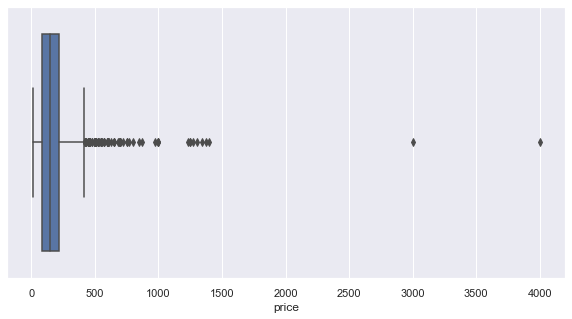

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

sns.boxplot(x=df2["price"] );
plt.show()

In [44]:
df3=df2.query('price>=20 & price<=1000')
df3.head()

,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,bed_type,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,Roslindale,Boston,MA,02131,42.282619,-71.133068,Virginia,...,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,Roslindale,Boston,MA,02131,42.292438,-71.135765,Phil,...,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000
3,1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale,Boston,MA,NaN,42.281106,-71.121021,Meghna,...,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,Roslindale,Boston,MA,02131,42.284512,-71.136258,Linda,...,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000


In [45]:
df3.shape

(3573, 26)

## Write the cleaned data for further analysis

In [46]:
df3.to_csv('airbnb_boston/listings_cleaned.csv', index=False)

In [47]:
## Load the data for further analysis

df=pd.read_csv('airbnb_boston/listings_cleaned.csv')

df.head()

,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,bed_type,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,Roslindale,Boston,MA,02131,42.282619,-71.133068,Virginia,...,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,Roslindale,Boston,MA,02131,42.292438,-71.135765,Phil,...,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000
3,1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale,Boston,MA,NaN,42.281106,-71.121021,Meghna,...,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,Roslindale,Boston,MA,02131,42.284512,-71.136258,Linda,...,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
